# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `liar.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

In [8]:
from google.colab import files
uploaded = files.upload()

Saving spamham.txt to spamham.txt



*Priyatham Kumanduri* 
* *3497429* 
* *Electrical Engineering*
* *M.Sc.*

*Albi Mema*  
* 3516766
* Infotech Embedded Systems
* M.Sc.

*Swathi Venkatesan*
* 3505997
* Infotech
* MSc


In [18]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_liar_dataset():
    import string
    
    with open('liar.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_liar_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[1]}: {X[1]}')

Sample:
ham: ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
ham: ['ok', 'lar', 'joking', 'wif', 'u', 'oni']


## Task 2: Fake News Classification with Naive Bayes

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is fake or real (not fake).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'fake'` and `'real'`.

Fill out the methods in `NaiveBayesFakeNewsClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [19]:
# Implement your solution here.
from collections import Counter
class NaiveBayesFakeNewsClassifier(object):
    def __init__(self):
        self.vocab_real = dict()
        self.vocab_fake = dict()
        self.number_of_articles = 0
        self.classes = [0, 0]
        self.articles_per_class = [0, 0]
        self.priors = [0, 0]
        self.total_words_count = 0

    
    def fit(self, X, y):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        y is a list of `n` labels either the string 'fake' or the string 'real'.
        """
        dict_y = dict()
        self.number_of_articles = len(X) # Storing number of articles present in X
        self.dict_y = dict(Counter(y))
        self.classes = list(self.dict_y.keys()) # Storing no of classes present in y
        print(self.classes)
        self.articles_per_class = list(dict(Counter(y)).values()) # Storing no of articles each class have in list
        # Creating two bags of words each for real and fake classes
        for i in range(len(X)):

          if y[i] == 'real':
            class_label = 0
            self.vocab_real = dict(Counter(self.vocab_real) + Counter(X[i]))
          
          elif y[i] == 'fake':
            class_label = 1
            self.vocab_fake = dict(Counter(self.vocab_fake) + Counter(X[i]))
          # Finding the log priors of both classes
        self.total_words_count = len(Counter(self.vocab_real) + Counter(self.vocab_fake))
        self.priors = [np.log(self.articles_per_class[0]/self.number_of_articles), np.log(self.articles_per_class[1]/self.number_of_articles)]
        
    
    def predict(self, X):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        The method returns a list of `n` strings, i.e. classification labels ('fake' or 'real').
        """
        
    # Finding the positive and negative likelihood then considering the class with highest likelihood as the predicted class
        classification_labels = []
        for i in range(len(X)): 
          pos_likelihood = 0
          neg_likelihood = 0
          for j in X[i]:
            if j in self.vocab_real:
              pos_likelihood = pos_likelihood + np.log(((self.vocab_real[j] + 1)/(sum(self.vocab_real.values()) + self.total_words_count + 1)))
            else:
              pos_likelihood = pos_likelihood + np.log(((1)/(sum(self.vocab_real.values()) + self.total_words_count + 1)))

            if j in self.vocab_fake:
              neg_likelihood = neg_likelihood + np.log(((self.vocab_fake[j] + 1)/(sum(self.vocab_fake.values()) + self.total_words_count + 1)))
            else:
              neg_likelihood = neg_likelihood + np.log(((1)/(sum(self.vocab_fake.values()) + self.total_words_count + 1)))
          
          pos_likelihood = pos_likelihood + self.priors[0]
          neg_likelihood = neg_likelihood + self.priors[1]
          probabilities = np.array([pos_likelihood, neg_likelihood])
          
          label = np.argmax(probabilities)
          
          classification_labels.append(self.classes[label])
          
    
        return classification_labels


['ham', 'spam']
The accuracy is = 0.976688583383144


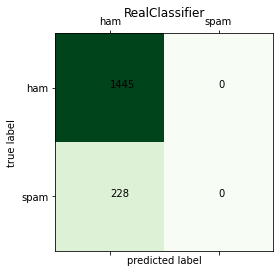

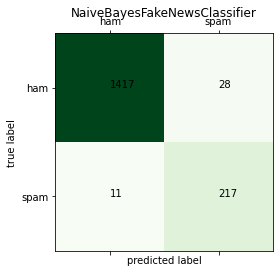

In [20]:
# The following code will evaluate your classifier.
class RealClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['real']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['real', 'fake'])
    
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'real', 'fake'])
    ax.set_yticklabels(['', 'real', 'fake'])
    ax.set_title(classifier_name)

    
    
real_classifier = RealClassifier()
your_classifier = NaiveBayesFakeNewsClassifier()
real_cmatrix = train_evaluate(real_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(real_cmatrix, 'RealClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesFakeNewsClassifier')
tp = your_cmatrix[0][0]
tn = your_cmatrix[1][1]
fp = your_cmatrix[0][1]
fn = your_cmatrix[1][0]
accuracy = (tp+tn)/(tp+fp+tn+fn)
print('The accuracy is =', accuracy)